#funciona cnn y gan

In [ ]:
!pip install onnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 28.2 MB/s eta 0:00:00


In [ ]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
checkpoint_path = "/content/dog_emotion_model.pth" # Or checkpoint_epoch_2.pth, depending on which epoch you want


In [ ]:
# Check if the file exists
import os
if not os.path.exists(checkpoint_path):
    print(f"Error: Checkpoint file not found at {checkpoint_path}")
else:
    print(f"Checkpoint file found at {checkpoint_path}")
    print(f"File size: {os.path.getsize(checkpoint_path)} bytes")

# Load the checkpoint file

# Load the checkpoint dictionary
try:
    checkpoint = torch.load(checkpoint_path, map_location=device)

    # Print the keys in the checkpoint dictionary to understand its structure
    print("Keys in checkpoint dictionary:", checkpoint.keys())

    # Based on the traceback and the keys in the checkpoint, the saved model is likely a ResNet.
    # Initialize the model with the correct architecture (assuming resnet18 based on key structure)
    # You might need to adjust the number of output classes if your original model was trained with a different number.
    num_classes = 4 # Assuming 4 classes for dog emotion as per your class_names list later
    model = models.resnet18(pretrained=False) # Start with a fresh ResNet18
    # Modify the final fully connected layer to match the number of classes
    num_ftrs = model.fc.in_features
    model.fc = torch.nn.Linear(num_ftrs, num_classes)


    # Assuming the state dict is the loaded dictionary itself (as indicated by the traceback
    # and the global variable showing checkpoint as an OrderedDict), load it directly.
    # If printing the keys shows the state dict is under a different key (e.g., 'state_dict'), use:
    # model.load_state_dict(checkpoint['state_dict'])
    # The traceback indicates the load_state_dict(checkpoint) call failed due to architecture mismatch,
    # not because the state dict was nested under a key.

    # Load the state dictionary into the initialized ResNet model
    # Use strict=False if the saved state dict has unexpected keys (like optimizer state, etc.)
    # The previous attempt with checkpoint['model_state_dict'] failed due to a KeyError,
    # and the direct load_state_dict(checkpoint) failed due to architecture mismatch.
    # Since the keys in the checkpoint match a ResNet, loading the entire checkpoint
    # into the ResNet model should work if the checkpoint only contains the model state dict.
    # If it still fails with unexpected keys, consider filtering the checkpoint dictionary.

    # Attempt to load the state dict directly from the checkpoint
    try:
        # If the checkpoint is just the model state dict
        model.load_state_dict(checkpoint)
        print("Loaded state dict from the entire dictionary.")
    except RuntimeError as e:
        print(f"Direct load failed: {e}")
        # If the checkpoint is a dictionary containing 'model_state_dict' under a different key,
        # you would find it by inspecting the printed keys.
        # If the error is about missing/unexpected keys still, it might be a different ResNet variant
        # or the checkpoint contains extra keys.
        # Based on the traceback, the checkpoint *is* the state dict of a ResNet-like model.
        # The previous error was because 'model_state_dict' wasn't a key, and the model was VGG.
        # Now with ResNet, the direct load should work if checkpoint contains only the state dict.
        # If not, inspect checkpoint.keys() and load the correct nested dictionary.
        # Example if state dict is under 'state_dict': model.load_state_dict(checkpoint['state_dict'])
        # Example if state dict is under 'model': model.load_state_dict(checkpoint['model'])
        pass # Re-raise or handle if necessary based on specific checkpoint structure


    print(f"Using device: {device}") # Optional: Print the device being used

    model = model.to(device)
    model.eval()

except RuntimeError as e:
    # Catch the specific RuntimeError from torch.load
    if "PytorchStreamReader failed reading zip archive" in str(e):
        print(f"Failed to load checkpoint due to zip archive error: {e}")
        print("This likely means the file is corrupted or not a valid PyTorch checkpoint.")
        print("Please verify the file integrity or try re-downloading/re-saving it.")
    else:
        # Re-raise other RuntimeErrors
        raise

Checkpoint file found at /content/dog_emotion_model.pth
File size: 44792618 bytes
Keys in checkpoint dictionary: odict_keys(['conv1.weight', 'bn1.weight', 'bn1.bias', 'bn1.running_mean', 'bn1.running_var', 'bn1.num_batches_tracked', 'layer1.0.conv1.weight', 'layer1.0.bn1.weight', 'layer1.0.bn1.bias', 'layer1.0.bn1.running_mean', 'layer1.0.bn1.running_var', 'layer1.0.bn1.num_batches_tracked', 'layer1.0.conv2.weight', 'layer1.0.bn2.weight', 'layer1.0.bn2.bias', 'layer1.0.bn2.running_mean', 'layer1.0.bn2.running_var', 'layer1.0.bn2.num_batches_tracked', 'layer1.1.conv1.weight', 'layer1.1.bn1.weight', 'layer1.1.bn1.bias', 'layer1.1.bn1.running_mean', 'layer1.1.bn1.running_var', 'layer1.1.bn1.num_batches_tracked', 'layer1.1.conv2.weight', 'layer1.1.bn2.weight', 'layer1.1.bn2.bias', 'layer1.1.bn2.running_mean', 'layer1.1.bn2.running_var', 'layer1.1.bn2.num_batches_tracked', 'layer2.0.conv1.weight', 'layer2.0.bn1.weight', 'layer2.0.bn1.bias', 'layer2.0.bn1.running_mean', 'layer2.0.bn1.running

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Loaded state dict from the entire dictionary.
Using device: cpu


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving WhatsApp Image 2025-05-27 at 9.52.34 AM.jpeg to WhatsApp Image 2025-05-27 at 9.52.34 AM.jpeg


Predicted class: 3
Predicción: neutro


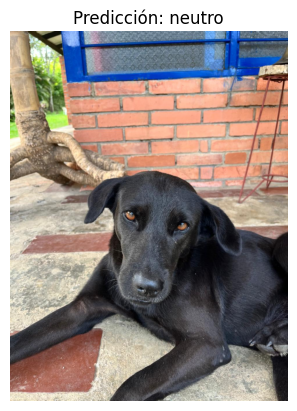

In [ ]:
# Procesamiento
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Cambia 'nombre.jpg' por el nombre real del archivo subido
img = Image.open("/content/perroNeutro.jpeg").convert('RGB')
input_tensor = transform(img).unsqueeze(0).to(device)
with torch.no_grad():
    outputs = model(input_tensor)
    _, predicted = torch.max(outputs, 1)
    pred_class = predicted.item()
print(f"Predicted class: {pred_class}")

# Define tus etiquetas personalizadas según tu dataset
#class_names = ['feliz', 'triste', 'neutro', 'enojado']  # Ejemplo
#class_names = ['enojado','feliz', 'neutro' ,'triste' ]  # Ejemplo
class_names = ['enojado','feliz', 'triste', 'neutro' ]  # Ejemplo
print(f"Predicción: {class_names[pred_class]}")
plt.imshow(img)
plt.axis('off')
plt.title(f'Predicción: {class_names[pred_class]}')
plt.show()


In [ ]:
#@title Anime FaceGAN Colab app

from io import BytesIO
import torch
from PIL import Image

import ipywidgets as widgets
import IPython.display as display
# No need to import files from google.colab anymore

device = "cuda" if torch.cuda.is_available() else "cpu"
model = torch.hub.load("bryandlee/animegan2-pytorch:main", "generator", device=device).eval()
face2paint = torch.hub.load("bryandlee/animegan2-pytorch:main", "face2paint", device=device)
image_format = "png" #@param ["jpeg", "png"]

button = widgets.Button(description="Start")
output = widgets.Output()

# Specify the path to your existing image file
image_path = "/content/perroNeutro.jpeg" # <--- Replace with the actual path to your image

# Load the image from the specified path
try:
    im_in = Image.open(image_path).convert("RGB")
    # Convert the image to bytes for the input widget display
    buffer_in = BytesIO()
    im_in.save(buffer_in, format=image_format)
    bytes_in = buffer_in.getvalue()
except FileNotFoundError:
    print(f"Error: The image file was not found at {image_path}")
    # You might want to handle this error, e.g., by exiting or displaying a message.
    # For this example, I'm just printing an error message.
    im_in = None # Set im_in to None to avoid further errors

def run(b, im_in, bytes_in):
    if im_in is None:
        print("Cannot run as the image file was not found.")
        return # Exit the function if the image wasn't loaded

    button.disabled = True

    with output:
        display.clear_output()

    im_out = face2paint(model, im_in, side_by_side=False)
    buffer_out = BytesIO()
    im_out.save(buffer_out, format=image_format)
    bytes_out = buffer_out.getvalue()

    wi1 = widgets.Image(value=bytes_in, format=image_format) # Use bytes_in for the input image display
    wi2 = widgets.Image(value=bytes_out, format=image_format)
    wi1.layout.max_width = '500px'
    wi1.layout.max_height = '500px'
    wi2.layout.max_width = '500px'
    wi2.layout.max_height = '500px'

    ## Side by side thanks to HBox widgets
    sidebyside = widgets.HBox([wi1, wi2])
    ## Finally, show.
    with output:
        display.display(sidebyside)

    button.disabled = False

# Modify the button event to call run with the loaded image and its byte representation
if im_in is not None: # Only attach the click handler if the image was loaded successfully
    button.on_click(lambda b: run(b, im_in, bytes_in))
    display.display(button, output)

Using cache found in /root/.cache/torch/hub/bryandlee_animegan2-pytorch_main
Using cache found in /root/.cache/torch/hub/bryandlee_animegan2-pytorch_main


Button(description='Start', style=ButtonStyle())

Output()

#convertir gan a ONNX


In [ ]:
# Cargar el generador
generator = torch.hub.load("bryandlee/animegan2-pytorch:main", "generator", device='cpu')
generator.eval()

# Crear entrada de ejemplo (tamaño habitual: 1x3x512x512)
dummy_input = torch.randn(1, 3, 256, 256)

# Exportar a ONNX
#torch.onnx.export(
#    generator,
#    dummy_input,
#    "facegan.onnx",
#    input_names=["input"],
#    output_names=["output"],
#    dynamic_axes={"input": {0: "batch_size"}, "output": {0: "batch_size"}},
#    opset_version=11
#)
torch.onnx.export(
    generator,
    dummy_input,
    "facegan.onnx",
    input_names=["input"],
    output_names=["output"],
    dynamic_axes={
        "input": {0: "batch_size", 2: "height", 3: "width"}, # Ejes 2 y 3 dinámicos
        "output": {0: "batch_size", 2: "height", 3: "width"}  # Ejes 2 y 3 dinámicos
    },
    opset_version=11
)


Using cache found in /root/.cache/torch/hub/bryandlee_animegan2-pytorch_main
/root/.cache/torch/hub/bryandlee_animegan2-pytorch_main/model.py:96: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if align_corners:
/root/.cache/torch/hub/bryandlee_animegan2-pytorch_main/model.py:102: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if align_corners:
/usr/local/lib/python3.11/dist-packages/torch/onnx/_internal/jit_utils.py:308: UserWarning: Constant folding - Only steps=1 can be constant folded for opset >= 10 onnx::Slice op. Constant folding not applied. (Trig